In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
%reload_ext autoreload

In [56]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import homography, rectification, my_types, utils

In [57]:
DATA = Path("data")

# Pick Correspondences

In [58]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [59]:
im1 = my_types.to_img_arr(im1_name)
im2 = my_types.to_img_arr(im2_name)
im3 = my_types.to_img_arr(im3_name)

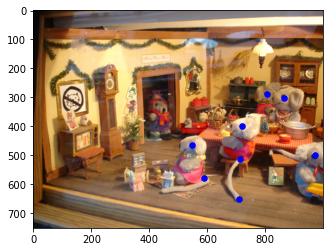

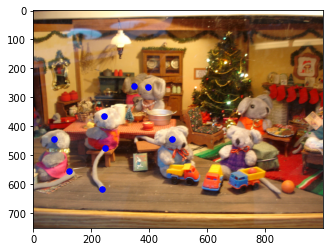

In [60]:
utils.plot_pts(im1, im1_pts)
utils.plot_pts(im2, im2_pts)

# Homography Matrix

In [61]:
# find homographic transformation matrix
H = homography.homo_matrix(im1_pts, im2_pts)
H

array([[ 1.16973903e+00, -4.41763292e-02, -5.34308084e+02],
       [-6.91450044e-03,  1.09612772e+00, -1.11329462e+01],
       [ 2.12107232e-04, -1.93414405e-05,  1.00000000e+00]])

# Image Rectification

In [68]:
PICK_NEW = False
SAVE_PTS = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"
pts1_name = DATA / "doll1_r.pkl"
pts2_name = DATA / "doll2_r.pkl"
pts3_name = DATA / "doll3_r.pkl"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 4)
    im2_pts = utils.pick_points(im2_name, 4)
    # im3_pts = utils.pick_points(im3_name, 4)
    if SAVE_PTS:
        utils.save_points(im1_pts, pts1_name)
        utils.save_points(im2_pts, pts2_name)
        # utils.save_points(im3_pts, pts3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(pts1_name)
    im2_pts = utils.load_points(pts2_name)
    # im3_pts = utils.load_points(pts3_name)

In [69]:
im1 = my_types.to_img_arr(im1_name)
im2 = my_types.to_img_arr(im2_name)
im3 = my_types.to_img_arr(im3_name)

In [70]:
im1_pts[:4]

array([[606.02511206,  96.67273877],
       [603.15187909, 299.23566257],
       [887.60194231, 327.96799218],
       [883.29209286,  96.67273877]])

In [71]:
im2_pts[:4]

array([[140.81493506,  70.46474954],
       [154.72959184, 277.79313544],
       [413.54220779, 286.1419295 ],
       [401.0190167 ,  69.07328386]])

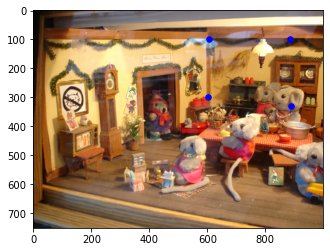

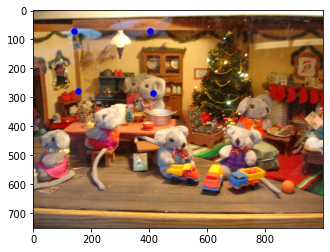

In [93]:
utils.plot_pts(im1, im1_pts[:4])
utils.plot_pts(im2, im2_pts[:4])

In [ ]:
plane_pts = np.array([[356.48025071,  69.50946074],
       [362.39321192, 306.02790918],
       [529.9271129 , 304.05692211],
       [535.84007411,  67.53847367]])
plane_pts = np.array([[360,  70],
       [360, 306],
       [560 , 306],
       [560,  70]])
# canvas = np.zeros_like(im1)
# utils.plot_pts(canvas, plane_pts)

In [101]:
h_matrix1 = homography.homo_matrix(im1_pts[:4], plane_pts)
warp1, shift_pts1, shift_pts1 = homography.forward_warp(im1, h_matrix1)

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(1167, 999, 3)
0 0
1166 999
=====interpolate=====


In [ ]:
warp_pts1 = homography.warp_pts(im1_pts[:4], h_matrix1, shift_pts1, shift_pts1)
warp_pts1

In [98]:
h_matrix2 = homography.homo_matrix(im2_pts[:4], plane_pts)
warp2, shift_pts2 = homography.forward_warp(im2, h_matrix2)

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(896, 760, 3)
0 0
895 758
=====interpolate=====


In [99]:
warp_pts2 = homography.warp_pts(im2_pts[:4], h_matrix2, shift_pts2)
warp_pts2

[[140.81493506  70.46474954]
 [154.72959184 277.79313544]
 [413.54220779 286.1419295 ]
 [401.0190167   69.07328386]]
[[140.81493506 154.72959184 413.54220779 401.0190167 ]
 [ 70.46474954 277.79313544 286.1419295   69.07328386]
 [  1.           1.           1.           1.        ]]
[[360. 360. 560. 560.]
 [ 70. 306. 306.  70.]
 [  1.   1.   1.   1.]]


array([[159.,  82.],
       [159., 318.],
       [359., 318.],
       [359.,  82.]])

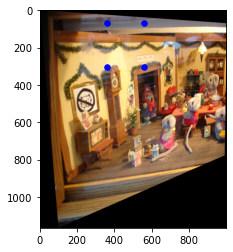

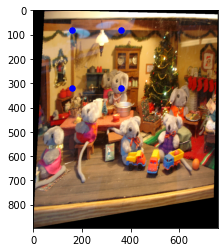

In [100]:
utils.plot_pts(warp1, warp_pts1)
utils.plot_pts(warp2, warp_pts2)

In [ ]:
aligned1, aligned2 = rectification.align(warp1, warp2, warp_pts1, warp_pts2)
plt.figure()
plt.imshow(aligned1)
plt.figure()
plt.imshow(aligned2)